<a href="https://colab.research.google.com/github/devUn9/Bitcoin-Insights/blob/main/bitcoin_insight_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### BTC 가격 데이터 전처리
import pandas as pd

# CSV 파일 읽기
file_path = "/content/BTC(2013-2024).csv"  # 파일 경로

# CSV 파일을 읽어오기 (Date, Price열만 선택)
df = pd.read_csv(file_path, usecols=['Date', 'Price'])

# 'Date' 열을 datetime 형식으로 변환 (형식을 '%m/%d/%Y'로 지정)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# 'Date' 열을 'YYYY-MM-DD' 형식으로 변환
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# 과거 시간부터 정렬 (Date 기준 오름차순 정렬)
BTC_df = df.sort_values(by='Date', ascending=True)

#저장 및 데이터 확인
BTC_df.to_csv('BTC_data.csv', index=False)
print(BTC_df.head())
print(BTC_df.tail())

            Date Price
4350  2013-01-01  13.3
4349  2013-01-02  13.3
4348  2013-01-03  13.4
4347  2013-01-04  13.5
4346  2013-01-05  13.4
         Date     Price
4  2024-11-25  93,064.4
3  2024-11-26  91,977.6
2  2024-11-27  95,886.6
1  2024-11-28  95,645.5
0  2024-11-29  98,385.4


In [29]:
### WTI 가격 데이터 전처리
import pandas as pd

# CSV 파일 읽기
file_path = "/content/WTI(2013-2024).csv"  # 파일 경로

df = pd.read_csv(file_path, usecols=['Date', 'Price'])

### 2013-01-01 Date 없어서 만들기
new_row = pd.DataFrame({'Date': [pd.to_datetime('2013-01-01')], 'Price': [None]})
df = pd.concat([new_row, df], ignore_index=True)

# Date 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 전체 날짜 범위를 생성 (최소 날짜부터 최대 날짜까지)
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# 'Date' 열을 인덱스로 설정하고, 전체 날짜 범위에 맞춰 재인덱싱
df.set_index('Date', inplace=True)
df = df.reindex(date_range, method=None)

# 'Price' 열의 결측값을 이전 값으로 채우기 (forward fill)
df['Price'] = df['Price'].fillna(method='ffill')

# 'Date' 열을 다시 DataFrame으로 복원
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

### '2013-01-01'만 bfill로 채우기
df.loc[df['Date'] == '2013-01-01', 'Price'] = df['Price'].bfill()

# 과거 시간부터 정렬 (Date 기준 오름차순 정렬)
WTI_df = df.sort_values(by='Date', ascending=True)

#저장 및 데이터 확인
WTI_df.to_csv('WTI_data.csv', index=False)
print(WTI_df.head())
print(WTI_df.tail())

<ipython-input-29-fd10b731c42e>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([new_row, df], ignore_index=True)


TypeError: '<=' not supported between instances of 'Timestamp' and 'str'

In [ ]:
### XAU 가격 데이터 전처리
import pandas as pd

# CSV 파일 읽기
file_path = "/content/XAU(2013-2024).csv"  # 파일 경로

df = pd.read_csv(file_path, usecols=['Date', 'Price'])

# Date 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 전체 날짜 범위를 생성 (최소 날짜부터 최대 날짜까지)
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')


# 'Date' 열을 인덱스로 설정하고, 전체 날짜 범위에 맞춰 재인덱싱
df.set_index('Date', inplace=True)
df = df.reindex(date_range, method=None)

# 'Price' 열의 결측값을 이전 값으로 채우기 (forward fill)
df['Price'] = df['Price'].fillna(method='ffill')

# 'Date' 열을 다시 DataFrame으로 복원
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

# 과거 시간부터 정렬
XAU_df = df.sort_values(by='Date', ascending=True)

#저장 및 데이터 확인
XAU_df.to_csv('XAU_data.csv', index=False)
print(XAU_df.head())
print(XAU_df.tail())

        Date     Price
0 2013-01-01  1,675.15
1 2013-01-02  1,686.75
2 2013-01-03  1,663.35
3 2013-01-04  1,656.85
4 2013-01-05  1,656.85
           Date     Price
4346 2024-11-25  2,625.26
4347 2024-11-26  2,631.89
4348 2024-11-27  2,635.51
4349 2024-11-28  2,640.96
4350 2024-11-29  2,657.80


<ipython-input-3-b216487f155a>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Price'] = df['Price'].fillna(method='ffill')


In [ ]:
### IXIC  데이터 전처리
import pandas as pd

# CSV 파일 읽기
file_path = "/content/IXIC(2013-2024).csv"  # 파일 경로

df = pd.read_csv(file_path, usecols=['Date', 'Price'])

### 2013-01-01 Date 없어서 만들기
new_row = pd.DataFrame({'Date': [pd.to_datetime('2013-01-01')], 'Price': [None]})
df = pd.concat([new_row, df], ignore_index=True)

# Date 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 전체 날짜 범위를 생성 (최소 날짜부터 최대 날짜까지)
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# 'Date' 열을 인덱스로 설정하고, 전체 날짜 범위에 맞춰 재인덱싱
df.set_index('Date', inplace=True)
df = df.reindex(date_range, method=None)

# 'Price' 열의 결측값을 이전 값으로 채우기 (forward fill)
df['Price'] = df['Price'].fillna(method='ffill')

# 'Date' 열을 다시 DataFrame으로 복원
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

### '2013-01-01'만 bfill로 채우기
df.loc[df['Date'] == '2013-01-01', 'Price'] = df['Price'].bfill()

# 과거 시간부터 정렬
IXIC_df = df.sort_values(by='Date', ascending=True)

#저장 및 확인
IXIC_df.to_csv('IXIC_data.csv', index=False)
print(IXIC_df.head())
print(IXIC_df.tail())


        Date     Price
0 2013-01-01  3,112.26
1 2013-01-02  3,112.26
2 2013-01-03  3,100.57
3 2013-01-04  3,101.66
4 2013-01-05  3,101.66
           Date      Price
4346 2024-11-25  19,054.84
4347 2024-11-26  19,175.58
4348 2024-11-27  19,060.48
4349 2024-11-28  19,060.48
4350 2024-11-29  19,102.21


<ipython-input-4-714792428130>:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Price'] = df['Price'].fillna(method='ffill')


In [ ]:
### 달러지수 DXY 데이터 전처리
import pandas as pd

# CSV 파일 읽기
file_path = "/content/DXY(2013-2024).csv"  # 파일 경로

df = pd.read_csv(file_path, usecols=['Date', 'Price'])

# Date 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 전체 날짜 범위를 생성 (최소 날짜부터 최대 날짜까지)
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')

# 'Date' 열을 인덱스로 설정하고, 전체 날짜 범위에 맞춰 재인덱싱
df.set_index('Date', inplace=True)
df = df.reindex(date_range, method=None)

# 'Price' 열의 결측값을 이전 값으로 채우기 (forward fill)
df['Price'] = df['Price'].fillna(method='ffill')

# 'Date' 열을 다시 DataFrame으로 복원
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

### '2013-01-01'만 bfill로 채우기
df.loc[df['Date'] == '2013-01-01', 'Price'] = df['Price'].bfill()

# 과거 시간부터 정렬
DXY_df = df.sort_values(by='Date', ascending=True)

#저장
DXY_df.to_csv('DXY_data.csv', index=False)
print(DXY_df.head())
print(DXY_df.tail())

        Date  Price
0 2013-01-01  79.77
1 2013-01-02  79.84
2 2013-01-03  80.38
3 2013-01-04  80.50
4 2013-01-05  80.50
           Date   Price
4346 2024-11-25  106.82
4347 2024-11-26  107.01
4348 2024-11-27  106.08
4349 2024-11-28  106.05
4350 2024-11-29  105.92


<ipython-input-5-345053abcea1>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Price'] = df['Price'].fillna(method='ffill')


In [ ]:
### 통합 데이터 프레임 생성
import pandas as pd
from functools import reduce

df1 = pd.read_csv('BTC_data.csv')
df2 = pd.read_csv('DXY_data.csv')
df3 = pd.read_csv('IXIC_data.csv')
df4 = pd.read_csv('XAU_data.csv')
df5 = pd.read_csv('WTI_data.csv')

dfs = [df1, df2, df3, df4, df5]

# 열 이름 지정 Date, BTC, DXY, IXIC, XAU, WTI
df1.rename(columns={'Price': 'BTC'}, inplace=True)
df2.rename(columns={'Price': 'DXY'}, inplace=True)
df3.rename(columns={'Price': 'IXIC'}, inplace=True)
df4.rename(columns={'Price': 'XAU'}, inplace=True)
df5.rename(columns={'Price': 'WTI'}, inplace=True)

# reduce를 사용하여 병합
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how='inner'), dfs)

# 저장 및 확인
merged_df.to_csv('merged_data.csv', index=False)
print(merged_df.head())
print(merged_df.tail())

         Date   BTC    DXY      IXIC       XAU    WTI
0  2013-01-01  13.3  79.77  3,112.26  1,675.15  93.12
1  2013-01-02  13.3  79.84  3,112.26  1,686.75  93.12
2  2013-01-03  13.4  80.38  3,100.57  1,663.35  92.92
3  2013-01-04  13.5  80.50  3,101.66  1,656.85  93.09
4  2013-01-05  13.4  80.50  3,101.66  1,656.85  93.09
         Date   BTC    DXY      IXIC       XAU    WTI
0  2013-01-01  13.3  79.77  3,112.26  1,675.15  93.12
1  2013-01-02  13.3  79.84  3,112.26  1,686.75  93.12
2  2013-01-03  13.4  80.38  3,100.57  1,663.35  92.92
3  2013-01-04  13.5  80.50  3,101.66  1,656.85  93.09
4  2013-01-05  13.4  80.50  3,101.66  1,656.85  93.09
            Date       BTC     DXY       IXIC       XAU    WTI
4346  2024-11-25  93,064.4  106.82  19,054.84  2,625.26  68.94
4347  2024-11-26  91,977.6  107.01  19,175.58  2,631.89  68.77
4348  2024-11-27  95,886.6  106.08  19,060.48  2,635.51  68.72
4349  2024-11-28  95,645.5  106.05  19,060.48  2,640.96  68.86
4350  2024-11-29  98,385.4  105.92  1

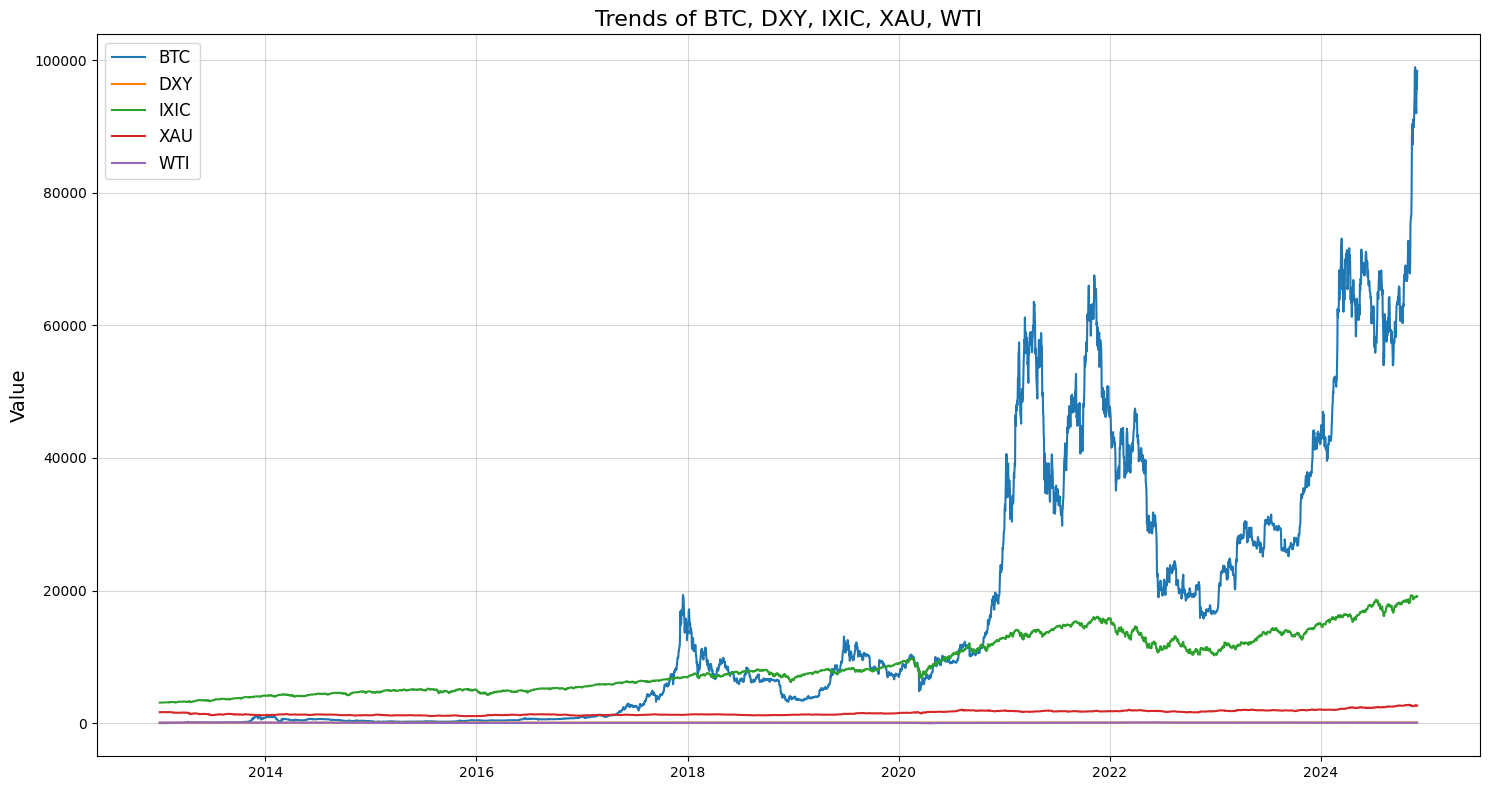

In [32]:
### 비트코인 가격과 금융 지표 단순 시각화

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/merged_data.csv')

# 분석할 열
columns_to_plot = ['BTC', 'DXY', 'IXIC', 'XAU', 'WTI']

# 데이터 정리: 숫자형 데이터로 변환 (필요할 경우 ',' 제거 후 변환)
for col in columns_to_plot:
    df[col] = df[col].replace(',', '', regex=True).astype(float)

# 날짜를 인덱스로 설정 (그래프를 시간 순서대로 그리기 위해)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 시각화
plt.figure(figsize=(15, 8))

for col in columns_to_plot:
    plt.plot(df.index, df[col], label=col)

plt.title("Trends of BTC, DXY, IXIC, XAU, WTI", fontsize=16)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# 그래프 출력
plt.show()

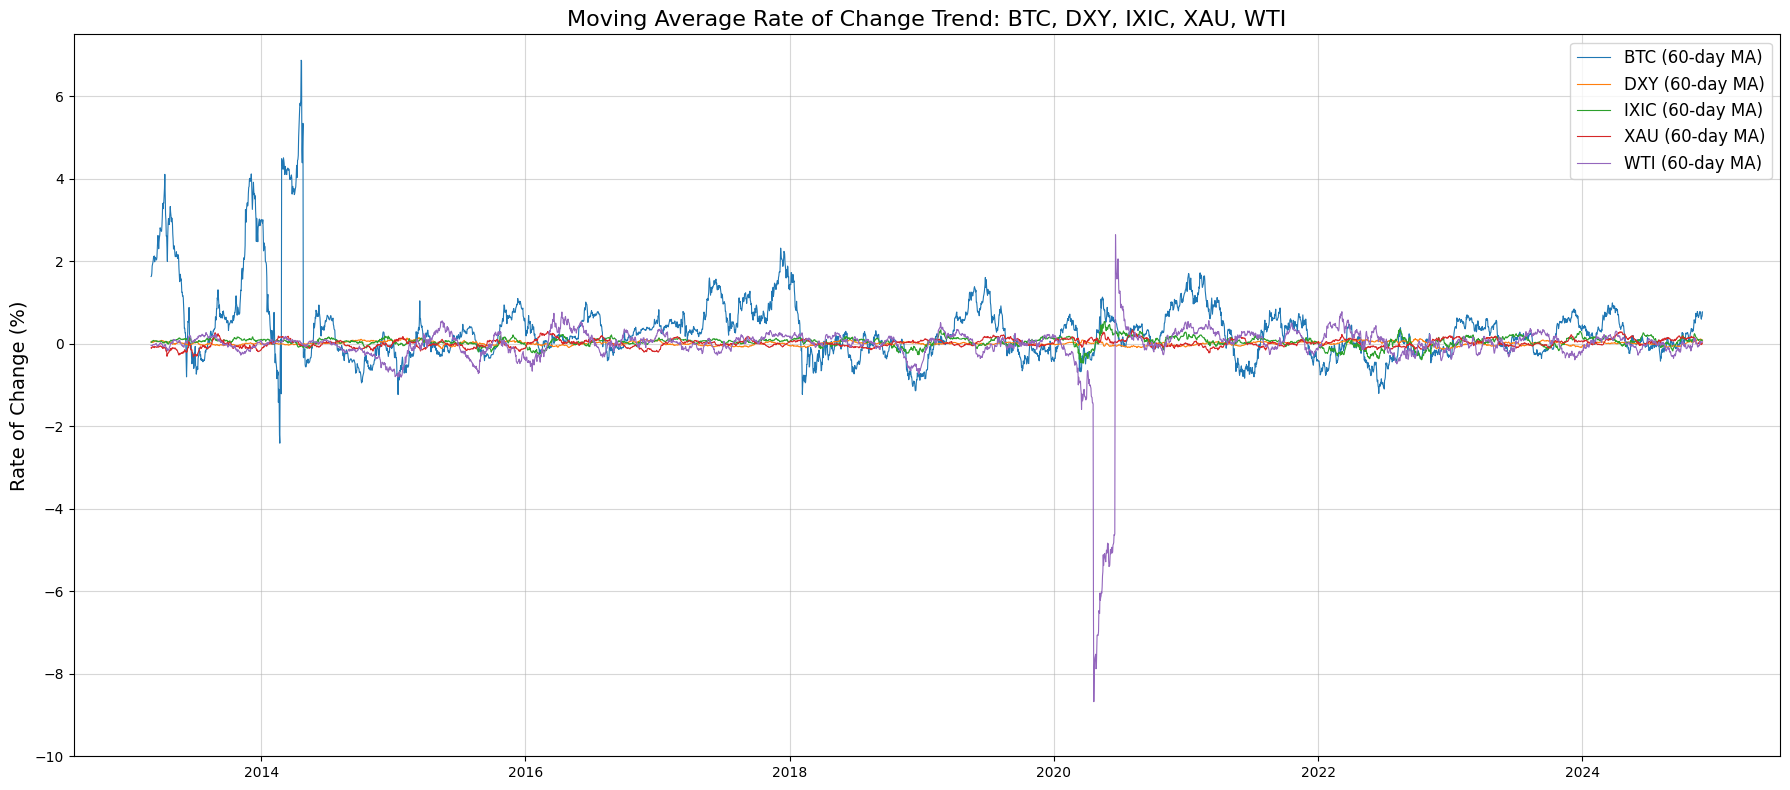

In [31]:
### 각 지표별 60일간 이동평균선의 변화율 시각화

import pandas as pd  # 'pd' as an alias for pandas
import matplotlib.pyplot as plt  # 'plt' as an alias for matplotlib.pyplot
from sklearn.preprocessing import MinMaxScaler  # For scaling data

# CSV 파일 읽기
df = pd.read_csv('/content/merged_data.csv')

# 대상 열
columns_to_analyze = ['BTC', 'DXY', 'IXIC', 'XAU', 'WTI']

# 데이터 정리: 숫자형 데이터로 변환
for col in columns_to_analyze:
    df[col] = df[col].replace(',', '', regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'])

# 변화율 계산: percent change
df_pct_change = df[columns_to_analyze].pct_change() * 100  # 변화율을 %로 계산

# 이동 평균을 적용하여 부드럽게 하기
df_pct_change_smooth = df_pct_change.rolling(window=60).mean()

# 시각화
plt.figure(figsize=(18, 8))  # 그래프 크기 설정

for col in columns_to_analyze:
    plt.plot(df['Date'], df_pct_change_smooth[col], label=f"{col} (60-day MA)", linewidth=0.8)  # 선의 굵기를 0.8로 설정

plt.ylim(-10, 7.5)

# y축 범위 설정
plt.title("Moving Average Rate of Change Trend: BTC, DXY, IXIC, XAU, WTI", fontsize=16)
plt.ylabel("Rate of Change (%)", fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(alpha=0.5)

plt.tight_layout()  # 그래프 간격을 자동으로 조정
plt.show()

변동성이 높은 순으로 정렬된 평균 변화율:
BTC     2.775245
WTI     1.335926
IXIC    0.605063
XAU     0.471646
DXY     0.221898
dtype: float64


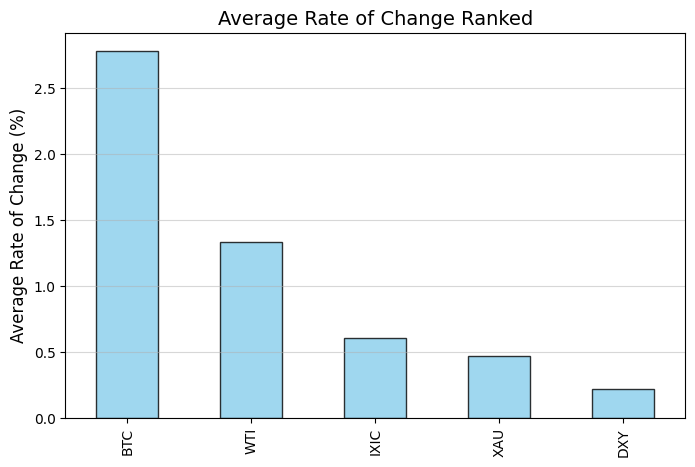

In [ ]:
### 각 금융 지표별 변동성 순위
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('/content/merged_data.csv')

# 분석할 열 정의
columns_to_analyze = ['BTC', 'DXY', 'IXIC', 'XAU', 'WTI']

# 데이터 정리: 숫자형 데이터로 변환
for col in columns_to_analyze:
    df[col] = df[col].replace(',', '', regex=True).astype(float)

# 변화율 계산
df_pct_change = df[columns_to_analyze].pct_change() * 100  # %로 변환

# 각 열의 평균 변화율 계산 (절대값 기준으로 변동성 확인)
mean_change = df_pct_change.abs().mean()

# 변동성이 높은 순으로 정렬
mean_change_sorted = mean_change.sort_values(ascending=False)

# 결과 출력
print("변동성이 높은 순으로 정렬된 평균 변화율:")
print(mean_change_sorted)

# 시각화: 막대 그래프
plt.figure(figsize=(8, 5))
mean_change_sorted.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')
plt.title("Average Rate of Change Ranked", fontsize=14)
plt.ylabel("Average Rate of Change (%)", fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

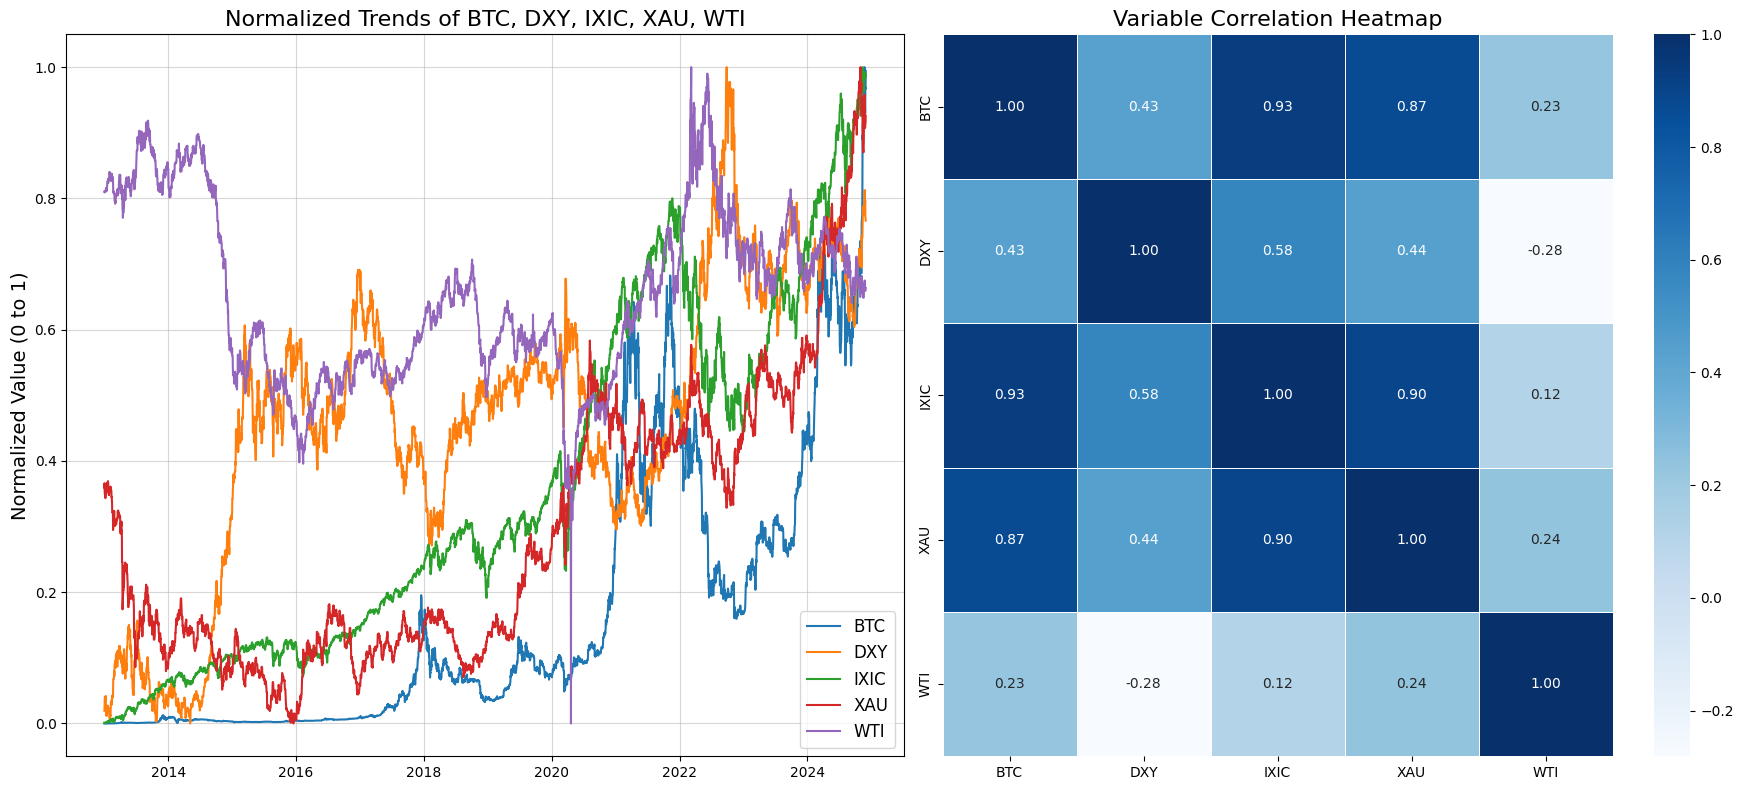

In [34]:
### 비트코인과 금융 지표별 정규화 그래프 및 상관관계 히트맵 시각화

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# CSV 파일 읽기
df = pd.read_csv('/content/merged_data.csv')

# 정규화 대상 열 선택
columns_to_normalize = ['BTC', 'DXY', 'IXIC', 'XAU', 'WTI']

# 데이터 정리: 숫자형 데이터로 변환
for col in columns_to_normalize:
    df[col] = df[col].replace(',', '', regex=True).astype(float)

df['Date'] = pd.to_datetime(df['Date'])

# Min-Max 정규화
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# 상관계수 계산
correlation_matrix = df[columns_to_normalize].corr()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열의 서브플롯 생성

# 첫 번째 그래프: 정규화된 값들 시각화
for col in columns_to_normalize:
    axes[0].plot(df['Date'], df[col], label=col)

axes[0].set_title("Normalized Trends of BTC, DXY, IXIC, XAU, WTI", fontsize=16)
axes[0].set_ylabel("Normalized Value (0 to 1)", fontsize=14)
axes[0].legend(loc='best', fontsize=12)
axes[0].grid(alpha=0.5)

# 두 번째 그래프: 상관계수 히트맵 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Variable Correlation Heatmap", fontsize=16)

plt.tight_layout()  # 그래프 간격을 자동으로 조정
plt.show()



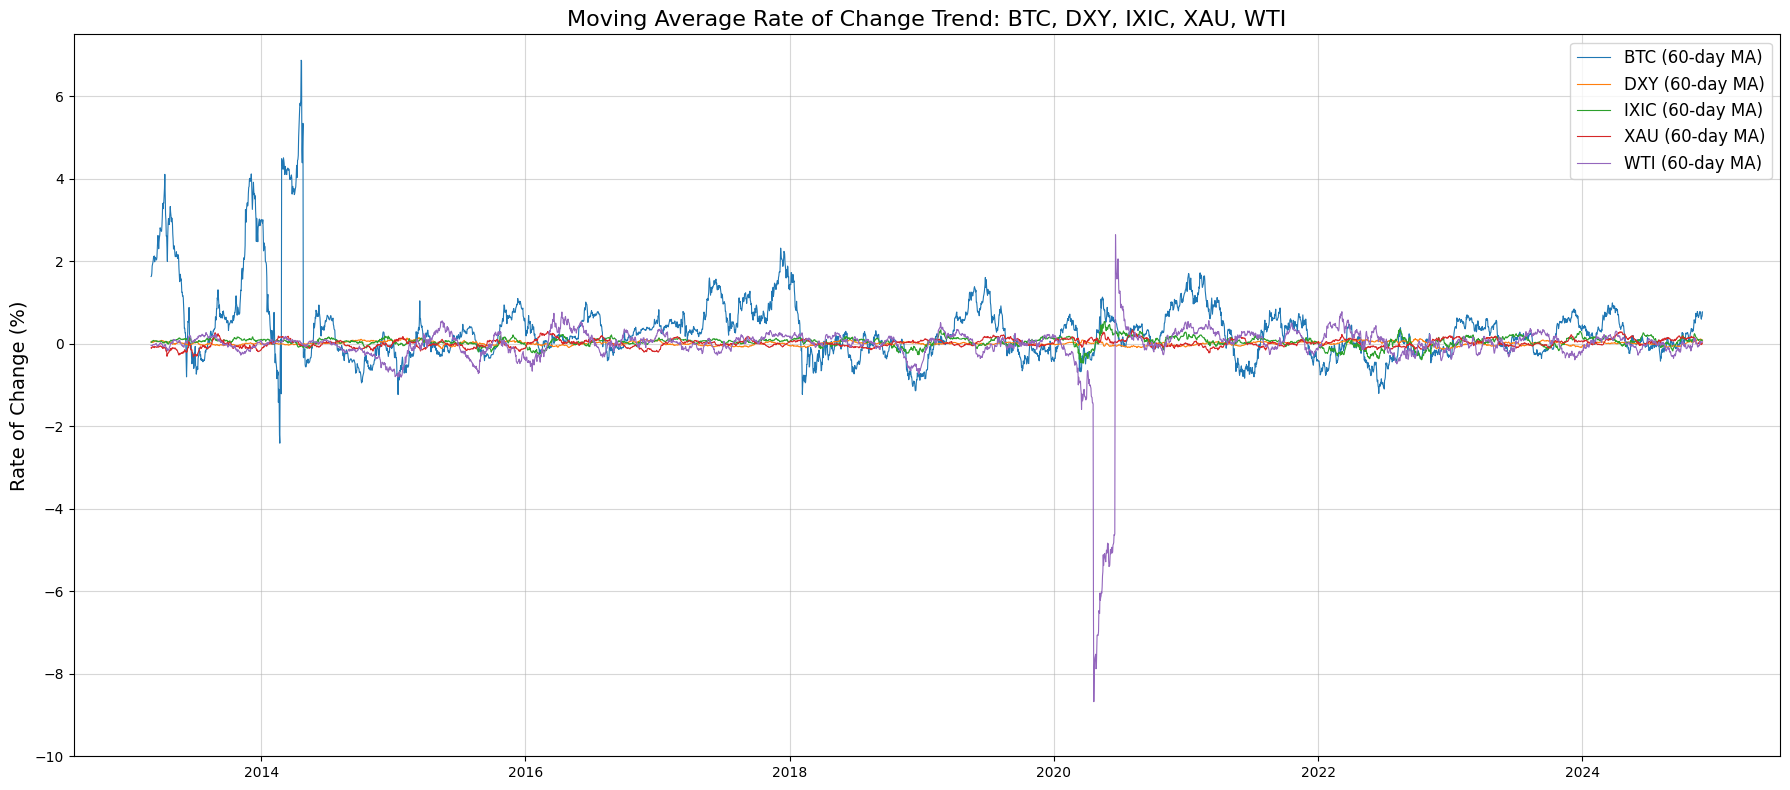

변동성이 높은 순으로 정렬된 평균 변화율:
BTC     2.775245
WTI     1.335926
IXIC    0.605063
XAU     0.471646
DXY     0.221898
dtype: float64


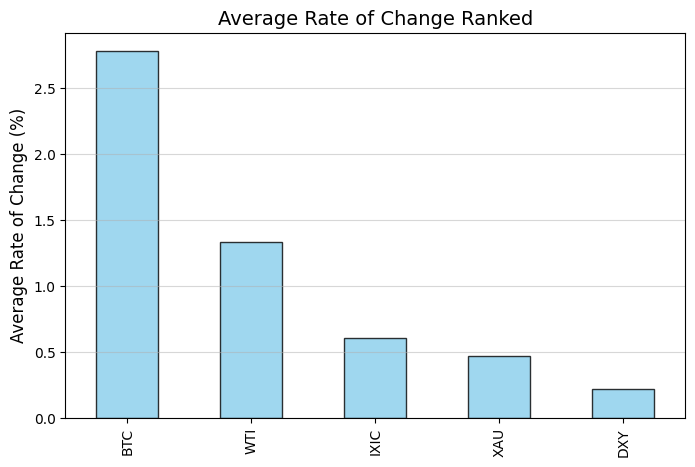

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
108/108 - 8s - 73ms/step - loss: 0.0013
Epoch 2/20
108/108 - 4s - 40ms/step - loss: 3.6459e-04
Epoch 3/20
108/108 - 2s - 20ms/step - loss: 3.2704e-04
Epoch 4/20
108/108 - 2s - 19ms/step - loss: 2.6955e-04
Epoch 5/20
108/108 - 3s - 26ms/step - loss: 2.5468e-04
Epoch 6/20
108/108 - 3s - 25ms/step - loss: 2.3866e-04
Epoch 7/20
108/108 - 4s - 41ms/step - loss: 2.0419e-04
Epoch 8/20
108/108 - 2s - 20ms/step - loss: 1.9247e-04
Epoch 9/20
108/108 - 2s - 20ms/step - loss: 1.7119e-04
Epoch 10/20
108/108 - 4s - 33ms/step - loss: 1.5968e-04
Epoch 11/20
108/108 - 4s - 37ms/step - loss: 1.4555e-04
Epoch 12/20
108/108 - 3s - 24ms/step - loss: 1.3509e-04
Epoch 13/20
108/108 - 3s - 24ms/step - loss: 1.3407e-04
Epoch 14/20
108/108 - 3s - 29ms/step - loss: 1.2594e-04
Epoch 15/20
108/108 - 3s - 26ms/step - loss: 1.2140e-04
Epoch 16/20
108/108 - 4s - 42ms/step - loss: 1.1023e-04
Epoch 17/20
108/108 - 3s - 23ms/step - loss: 1.0229e-04
Epoch 18/20
108/108 - 2s - 20ms/step - loss: 1.0816e-04
Epoch

<ipython-input-54-ce4d17809ac5>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_test_vis['Predictions'] = predicted_value


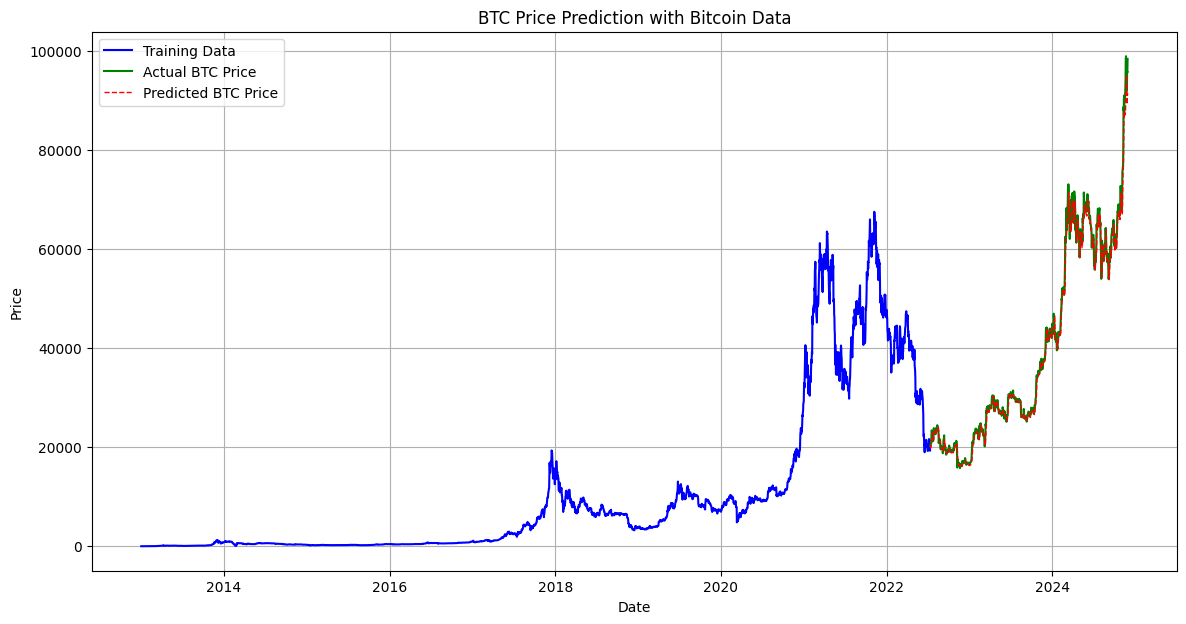

RMSE: 1633.4038321393216
MAE: 1048.580940773895
R^2: 0.9933086914788595


In [54]:
### LSTM을 이용한 비트코인 가격 예측 모델 (변수 : 시간별 비트코인 가격)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# 데이터 읽기
df = pd.read_csv('/content/merged_data.csv')

# 'BTC' 값 숫자형 데이터로 변환
df['BTC'] = df['BTC'].replace(',', '', regex=True).astype(float)


# 'BTC' 컬럼만 추출하고 DataFrame으로 변환
df_btc = pd.DataFrame(df['BTC'])
df_btc = df_btc.reset_index()
df_btc.columns = ['Date', 'BTC']
df_btc['Date'] = pd.to_datetime(df['Date'])
df_btc.set_index('Date', inplace=True)

# 데이터 분할
dataset_btc = df_btc.values
train_size = int(len(dataset_btc) * 0.8)
train_data, test_data = dataset_btc[:train_size], dataset_btc[train_size:]

# 'BTC' 열에서 쉼표 제거하고 실수형으로 변환
df['BTC'] = df['BTC'].replace(',', '', regex=True).astype(float)

# 데이터 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['BTC'].values.reshape(-1, 1))

# 학습 데이터 준비
x_train_data, y_train_data = [], []

# size 값 기준으로 데이터 생성
size = 28

for i in range(size, len(train_data)):
    x_train_data.append(scaled_data[i-size:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

# LSTM 모델 구성
lstm_btc = Sequential()
lstm_btc.add(LSTM(units=size, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_btc.add(LSTM(units=size))
lstm_btc.add(Dense(1))

# 모델 학습
lstm_btc.compile(loss='mean_squared_error', optimizer='adam')
lstm_btc.fit(x_train_data, y_train_data, epochs=20, batch_size=32, verbose=2)

# 테스트 데이터 준비
inputs_data = df_btc[len(df_btc) - len(test_data) - size:].values
inputs_data = np.reshape(inputs_data, (-1, 1))
inputs_data = scaler.transform(inputs_data)

# 테스트 데이터 예측
X_test = []
for i in range(size, inputs_data.shape[0]):
    X_test.append(inputs_data[i-size:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_value = lstm_btc.predict(X_test)
predicted_value = scaler.inverse_transform(predicted_value)

# 시각화
df_btc_train_vis = df_btc[:train_size]
df_btc_test_vis = df_btc[train_size:]
df_btc_test_vis['Predictions'] = predicted_value

plt.figure(figsize=(14, 7))
plt.plot(df_btc_train_vis['BTC'], label='Training Data', color='blue')
plt.plot(df_btc_test_vis['BTC'], label='Actual BTC Price', color='green')
plt.plot(df_btc_test_vis['Predictions'], label='Predicted BTC Price', color='red', linestyle='dashed',linewidth=1)
plt.legend()
plt.title('BTC Price Prediction with Bitcoin Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# RMSE 출력 (오차)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df_btc_test_vis['BTC'], df_btc_test_vis['Predictions']))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_btc_test_vis['BTC'], df_btc_test_vis['Predictions'])

from sklearn.metrics import r2_score
r2 = r2_score(df_btc_test_vis['BTC'], df_btc_test_vis['Predictions'])

print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
108/108 - 8s - 71ms/step - loss: 0.0022
Epoch 2/20
108/108 - 3s - 23ms/step - loss: 4.6361e-04
Epoch 3/20
108/108 - 3s - 23ms/step - loss: 3.8887e-04
Epoch 4/20
108/108 - 3s - 26ms/step - loss: 3.3076e-04
Epoch 5/20
108/108 - 3s - 25ms/step - loss: 2.8269e-04
Epoch 6/20
108/108 - 5s - 43ms/step - loss: 2.5268e-04
Epoch 7/20
108/108 - 2s - 23ms/step - loss: 2.2525e-04
Epoch 8/20
108/108 - 2s - 21ms/step - loss: 2.1544e-04
Epoch 9/20
108/108 - 3s - 30ms/step - loss: 1.9693e-04
Epoch 10/20
108/108 - 2s - 19ms/step - loss: 1.8226e-04
Epoch 11/20
108/108 - 2s - 19ms/step - loss: 1.6747e-04
Epoch 12/20
108/108 - 2s - 20ms/step - loss: 1.7684e-04
Epoch 13/20
108/108 - 2s - 23ms/step - loss: 1.6483e-04
Epoch 14/20
108/108 - 2s - 23ms/step - loss: 1.5176e-04
Epoch 15/20
108/108 - 3s - 28ms/step - loss: 1.4514e-04
Epoch 16/20
108/108 - 4s - 39ms/step - loss: 1.3036e-04
Epoch 17/20
108/108 - 2s - 19ms/step - loss: 1.5521e-04
Epoch 18/20
108/108 - 3s - 24ms/step - loss: 1.2219e-04
Epoch

<ipython-input-55-874d7953e5ba>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_test_vis['Predictions'] = predicted_value


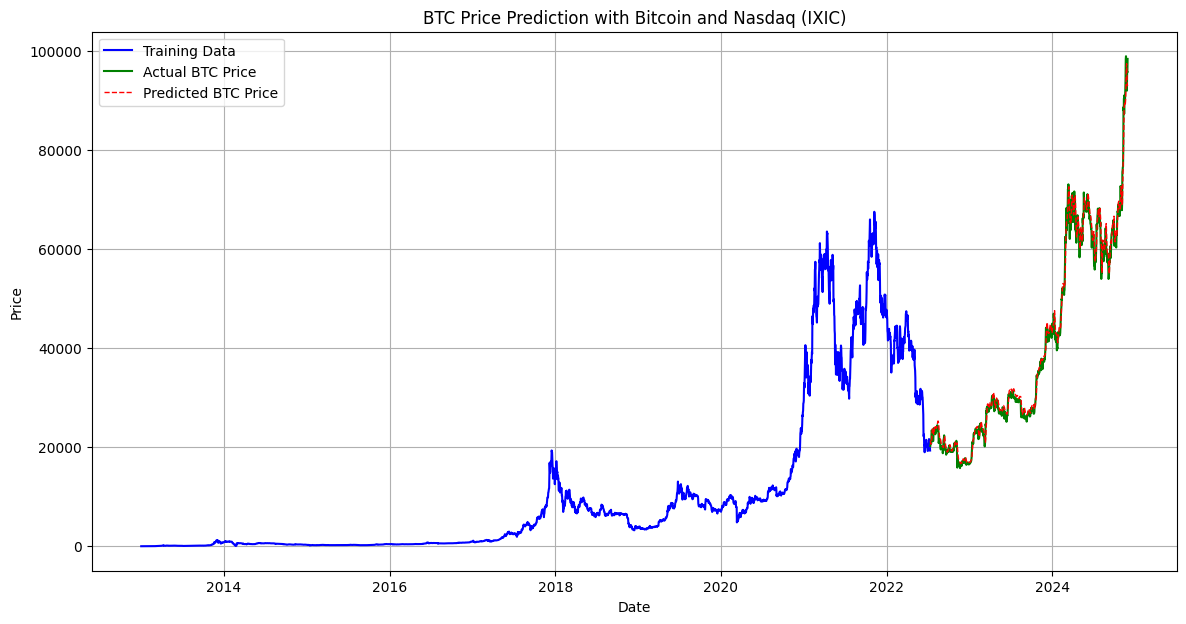

RMSE: 1694.8199965952874
MAE: 1229.734740958668
R^2: 0.9927960436404042


In [55]:
### LSTM을 이용한 비트코인 가격 예측 모델 (변수 : 시간별 비트코인 가격과 나스닥 지수)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# 데이터 읽기
df = pd.read_csv('/content/merged_data.csv')

# 'BTC' 열 값 숫자형 데이터로 변환
df['BTC'] = df['BTC'].replace(',', '', regex=True).astype(float)

# 'IXIC' 열 값 숫자형 데이터로 변환
df['IXIC'] = df['IXIC'].replace(',', '', regex=True).astype(float)

# 'BTC'와 'IXIC' 컬럼만 추출하고 DataFrame으로 변환
df_btc = pd.DataFrame(df[['BTC', 'IXIC']])
df_btc = df_btc.reset_index()
df_btc.columns = ['Date', 'BTC', 'IXIC']
df_btc['Date'] = pd.to_datetime(df['Date'])
df_btc.set_index('Date', inplace=True)

# 데이터 분할
dataset_btc = df_btc.values
train_size = int(len(dataset_btc) * 0.8)
train_data, test_data = dataset_btc[:train_size], dataset_btc[train_size:]

# 데이터 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_btc[['BTC', 'IXIC']].values)

# 학습 데이터 준비
x_train_data, y_train_data = [], []

# size 값 기준으로 데이터 생성
size = 28

for i in range(size, len(train_data)):
    x_train_data.append(scaled_data[i-size:i, :])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 2))  # 2는 BTC와 IXIC 두 개의 특성

# LSTM 모델 구성
lstm_btc = Sequential()
lstm_btc.add(LSTM(units=size, return_sequences=True, input_shape=(x_train_data.shape[1], x_train_data.shape[2])))
lstm_btc.add(LSTM(units=size))
lstm_btc.add(Dense(1))

# 모델 학습
lstm_btc.compile(loss='mean_squared_error', optimizer='adam')
lstm_btc.fit(x_train_data, y_train_data, epochs=20, batch_size=32, verbose=2)

# 테스트 데이터 준비
inputs_data = df_btc[len(df_btc) - len(test_data) - size:].values
inputs_data = np.reshape(inputs_data, (-1, 2))  # BTC와 IXIC 모두 포함
inputs_data = scaler.transform(inputs_data)

# 테스트 데이터 예측
X_test = []
for i in range(size, inputs_data.shape[0]):
    X_test.append(inputs_data[i-size:i, :])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))  # 2는 BTC와 IXIC 두 개의 특성

predicted_value = lstm_btc.predict(X_test)
predicted_value = scaler.inverse_transform(np.concatenate([predicted_value, np.zeros_like(predicted_value)], axis=1))[:, 0]  # 예측된 BTC 값만 추출

# 시각화
df_btc_train_vis = df_btc[:train_size]
df_btc_test_vis = df_btc[train_size:]
df_btc_test_vis['Predictions'] = predicted_value

plt.figure(figsize=(14, 7))
plt.plot(df_btc_train_vis['BTC'], label='Training Data', color='blue')
plt.plot(df_btc_test_vis['BTC'], label='Actual BTC Price', color='green')
plt.plot(df_btc_test_vis['Predictions'], label='Predicted BTC Price', color='red', linestyle='dashed', linewidth=1)
plt.legend()
plt.title('BTC Price Prediction with Bitcoin and Nasdaq (IXIC)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# RMSE 출력 (오차)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df_btc_test_vis['BTC'], df_btc_test_vis['Predictions']))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_btc_test_vis['BTC'], df_btc_test_vis['Predictions'])

from sklearn.metrics import r2_score
r2 = r2_score(df_btc_test_vis['BTC'], df_btc_test_vis['Predictions'])

print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


108/108 - 7s - 64ms/step - loss: 0.0032
Epoch 2/20
108/108 - 2s - 20ms/step - loss: 3.9695e-04
Epoch 3/20
108/108 - 3s - 23ms/step - loss: 3.5859e-04
Epoch 4/20
108/108 - 2s - 23ms/step - loss: 2.7741e-04
Epoch 5/20
108/108 - 3s - 23ms/step - loss: 2.6373e-04
Epoch 6/20
108/108 - 4s - 33ms/step - loss: 2.3184e-04
Epoch 7/20
108/108 - 4s - 38ms/step - loss: 2.1896e-04
Epoch 8/20
108/108 - 3s - 24ms/step - loss: 1.9330e-04
Epoch 9/20
108/108 - 2s - 19ms/step - loss: 2.1071e-04
Epoch 10/20
108/108 - 2s - 23ms/step - loss: 1.6981e-04
Epoch 11/20
108/108 - 3s - 30ms/step - loss: 1.7110e-04
Epoch 12/20
108/108 - 4s - 40ms/step - loss: 1.5329e-04
Epoch 13/20
108/108 - 3s - 29ms/step - loss: 1.4443e-04
Epoch 14/20
108/108 - 5s - 48ms/step - loss: 1.3743e-04
Epoch 15/20
108/108 - 2s - 22ms/step - loss: 1.5884e-04
Epoch 16/20
108/108 - 2s - 21ms/step - loss: 1.3407e-04
Epoch 17/20
108/108 - 2s - 19ms/step - loss: 1.4047e-04
Epoch 18/20
108/108 - 3s - 23ms/step - loss: 1.2705e-04
Epoch 19/20
108/

<ipython-input-56-666640d63590>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_test_vis['Predictions'] = predicted_value


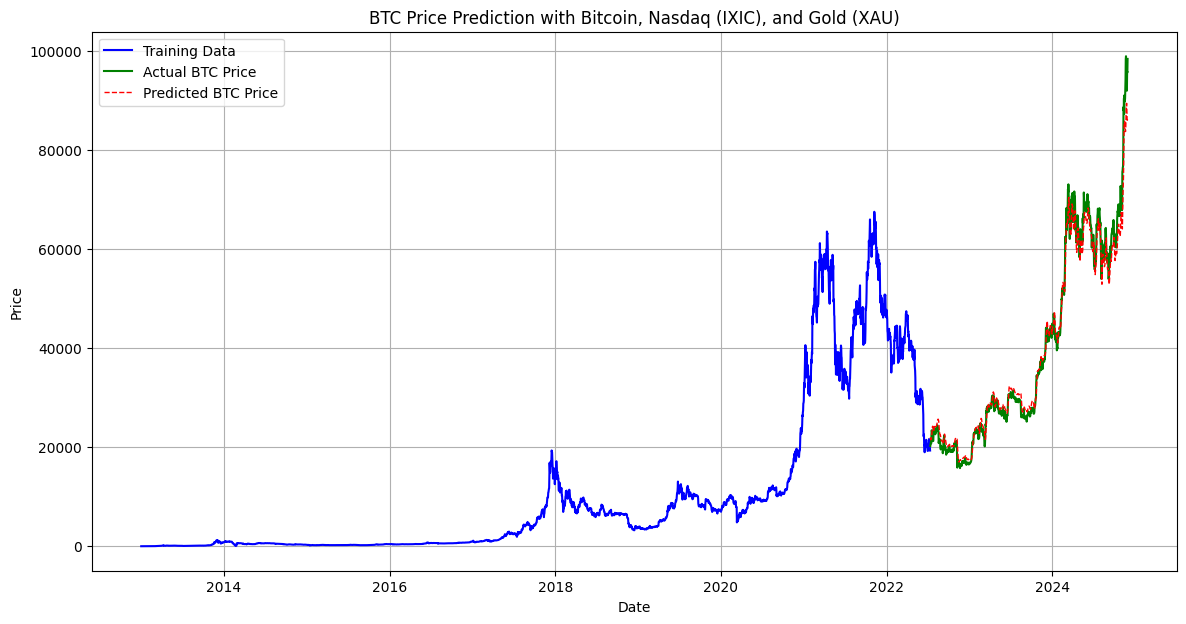

RMSE: 2513.6890368820345
MAE: 1773.1153088224742
R^2: 0.9841530015143095


In [56]:
### LSTM을 이용한 비트코인 가격 예측 모델 (변수 : 시간별 비트코인 가격, 나스닥 지수, 금 가격)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# 데이터 읽기
df = pd.read_csv('/content/merged_data.csv')

# 'BTC', 'IXIC', 'XAU' 열 실수형 데이터로 변환
df['BTC'] = df['BTC'].replace(',', '', regex=True).astype(float)
df['IXIC'] = df['IXIC'].replace(',', '', regex=True).astype(float)
df['XAU'] = df['XAU'].replace(',', '', regex=True).astype(float)

# 'BTC', 'IXIC', 'XAU' 컬럼만 추출하고 DataFrame으로 변환
df_btc = pd.DataFrame(df[['BTC', 'IXIC', 'XAU']])
df_btc = df_btc.reset_index()
df_btc.columns = ['Date', 'BTC', 'IXIC', 'XAU']
df_btc['Date'] = pd.to_datetime(df['Date'])
df_btc.set_index('Date', inplace=True)

# 데이터 분할
dataset_btc = df_btc.values
train_size = int(len(dataset_btc) * 0.8)
train_data, test_data = dataset_btc[:train_size], dataset_btc[train_size:]

# 데이터 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_btc[['BTC', 'IXIC', 'XAU']].values)

# 학습 데이터 준비
x_train_data, y_train_data = [], []

# size 값 기준으로 데이터 생성
size = 28

for i in range(size, len(train_data)):
    x_train_data.append(scaled_data[i-size:i, :])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 3))  # 3은 BTC, IXIC, XAU

# LSTM 모델 구성
lstm_btc = Sequential()
lstm_btc.add(LSTM(units=size, return_sequences=True, input_shape=(x_train_data.shape[1], x_train_data.shape[2])))
lstm_btc.add(LSTM(units=size))
lstm_btc.add(Dense(1))

# 모델 학습
lstm_btc.compile(loss='mean_squared_error', optimizer='adam')
lstm_btc.fit(x_train_data, y_train_data, epochs=20, batch_size=32, verbose=2)

# 테스트 데이터 준비
inputs_data = df_btc[len(df_btc) - len(test_data) - size:].values
inputs_data = np.reshape(inputs_data, (-1, 3))  # BTC, IXIC, XAU 모두 포함
inputs_data = scaler.transform(inputs_data)

# 테스트 데이터 예측
X_test = []
for i in range(size, inputs_data.shape[0]):
    X_test.append(inputs_data[i-size:i, :])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))  # 3은 BTC, IXIC, XAU

predicted_value = lstm_btc.predict(X_test)
predicted_value = scaler.inverse_transform(np.concatenate([predicted_value, np.zeros_like(predicted_value), np.zeros_like(predicted_value)], axis=1))[:, 0]  # 예측된 BTC 값만 추출

# 시각화
df_btc_train_vis = df_btc[:train_size]
df_btc_test_vis = df_btc[train_size:]
df_btc_test_vis['Predictions'] = predicted_value

plt.figure(figsize=(14, 7))
plt.plot(df_btc_train_vis['BTC'], label='Training Data', color='blue')
plt.plot(df_btc_test_vis['BTC'], label='Actual BTC Price', color='green')
plt.plot(df_btc_test_vis['Predictions'], label='Predicted BTC Price', color='red', linestyle='dashed', linewidth=1)
plt.legend()
plt.title('BTC Price Prediction with Bitcoin, Nasdaq (IXIC), and Gold (XAU)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# RMSE 출력 (오차)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df_btc_test_vis['BTC'], df_btc_test_vis['Predictions']))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_btc_test_vis['BTC'], df_btc_test_vis['Predictions'])

from sklearn.metrics import r2_score
r2 = r2_score(df_btc_test_vis['BTC'], df_btc_test_vis['Predictions'])

print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r2)